KNeighborsClassifier(n_neighbors=3)
SVC(C=0.025, kernel='linear', random_state=42)
GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1), random_state=42)
DecisionTreeClassifier(max_depth=5, random_state=42)
RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10,
                       random_state=42)
MLPClassifier(alpha=1, max_iter=1000, random_state=42)
GaussianNB()
QuadraticDiscriminantAnalysis()


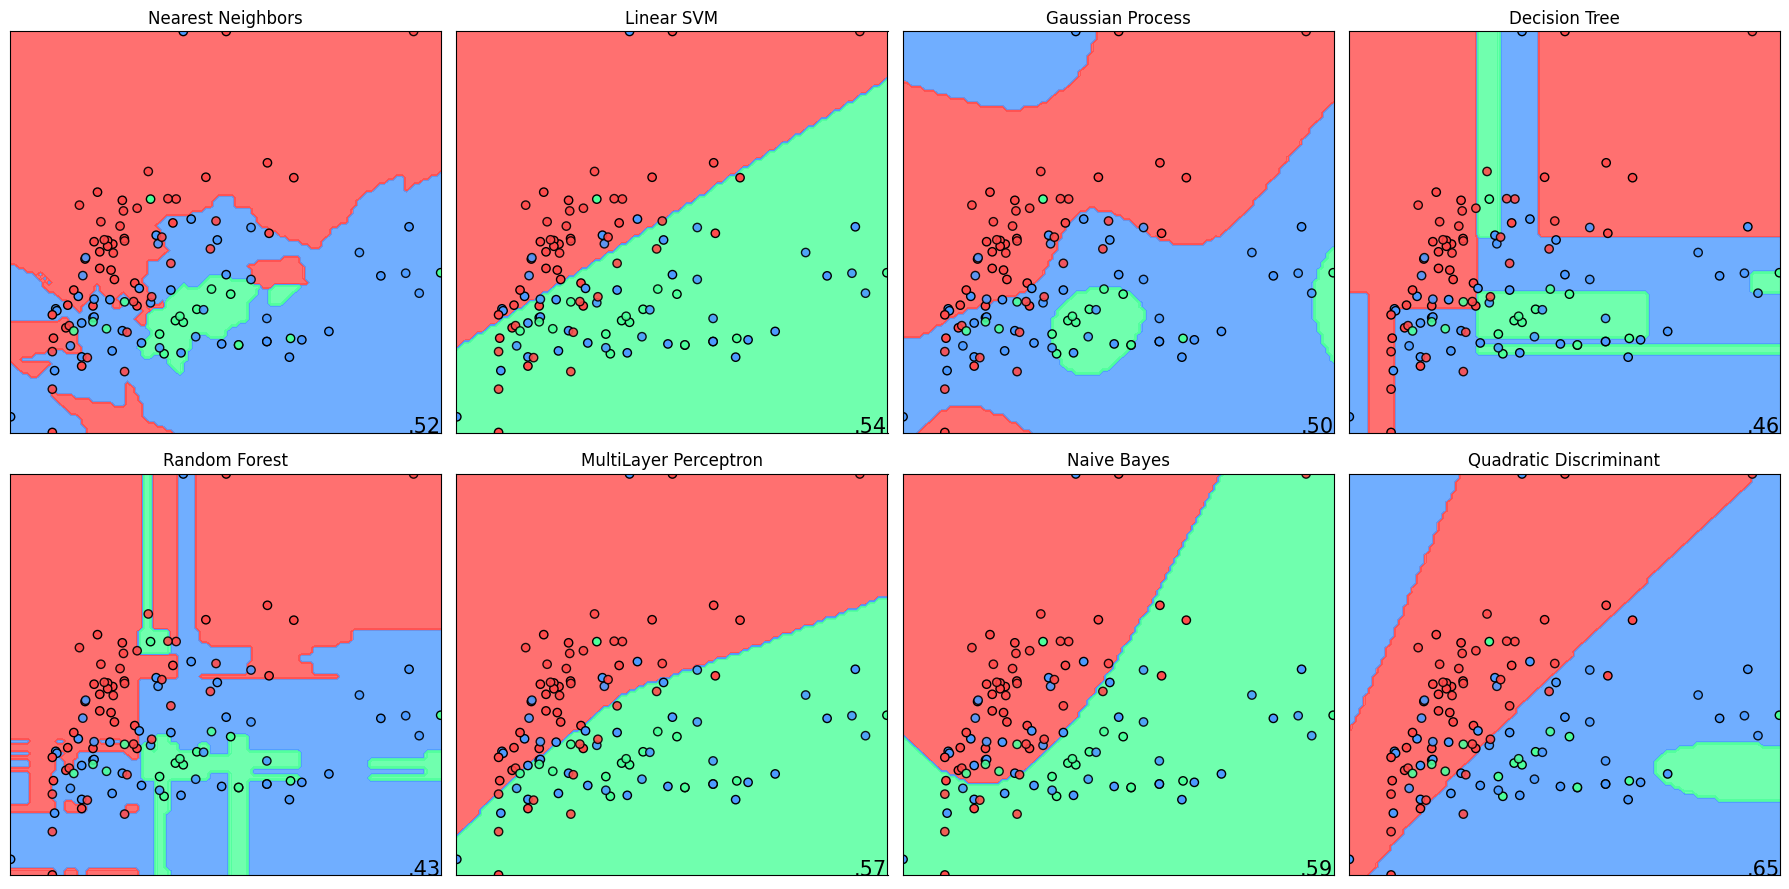

In [ ]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
import pandas as pd

# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]


names2 = ["Nearest Neighbors","Linear SVM","Gaussian Process","Decision Tree","Random Forest", 'MultiLayer Perceptron', "Naive Bayes",
    "Quadratic Discriminant",
]

classifiers2 = [KNeighborsClassifier(3), SVC(kernel="linear", C=0.025, random_state=42), GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42), DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42),MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    GaussianNB(), QuadraticDiscriminantAnalysis(),
]
# load data
# If the uploaded file name is 'yourfile.csv'
file_path = '/content/Comb_TestSet.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

# drop some columns from the df to keep only the super intresting features
df = df.drop(columns=['Age at Surgery', 'PAD_TAU','PAD_BETA-AMYLOIDI', 'Record ID' ])
df.head()

# sns.pairplot(df, hue='AD')
# plt.show()

# convert from pandas dataframe to tensor
data = torch.tensor( df[df.columns[1:3]].values ).float()
labels = torch.tensor( df[df.columns[4]].values ).float()

linearly_separable = (data, labels) # just load the data here
datasets = [linearly_separable]

figure = plt.figure(figsize=(18, 9))


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.4, random_state=42)

h = 0.1  # Step size in the mesh

# create a decision boundary
x_min, x_max = data[:, 0].min() - 0.5, data[:, 0].max() + 0.5
y_min, y_max = data[:, 1].min() - 0.5, data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))


# Define colors for three classes
cm = ListedColormap(['#FF4C4C', '#4C9AFF', '#4CFF9A'])  # Bright Red, Bright Blue, Bright Green
cm_bright = ListedColormap(['#FF4C4C', '#4C9AFF', '#4CFF9A'])

# iterate over classifiers
i = 1 # start counter for plotting
for name, clf in zip(names2, classifiers2):

  print(clf)

  ax = plt.subplot(2, 4, i)

  clf = make_pipeline(StandardScaler(), clf) # create a pipeline
  clf.fit(X_train, y_train)

  score = clf.score(X_test, y_test)
  DecisionBoundaryDisplay.from_estimator(clf, data, cmap=cm, alpha=0.8, ax=ax, eps=0.5  )

  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k" )
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,  cmap=cm_bright, edgecolors="k",alpha=0.9)

  ax.set_xlim(x_min, x_max)
  ax.set_ylim(y_min, y_max)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(name)
  ax.text(x_max - 0.3, y_min + 0.3,("%.2f" % score).lstrip("0"),size=15,horizontalalignment="right")

  i += 1 # increase i as an index for plotting

plt.tight_layout()
plt.show()
